In [1]:
import csv
import pandas as pd

In [9]:
teams = pd.read_csv('C:/Users/User/Desktop/DataFiles/Teams.csv')
seasons = pd.read_csv('C:/Users/User/Desktop/DataFiles/Seasons.csv')
reg_season_stats_compact = pd.read_csv('C:/Users/User/Desktop/DataFiles/RegularSeasonCompactResults.csv')
reg_season_stats = pd.read_csv('C:/Users/User/Desktop/DataFiles/RegularSeasonDetailedResults.csv')
cities = pd.read_csv('C:/Users/User/Desktop/DataFiles/Cities.csv')
tourney_stats_compact = pd.read_csv('C:/Users/User/Desktop/DataFiles/NCAATourneyCompactResults.csv')
tourney_stats = pd.read_csv('C:/Users/User/Desktop/DataFiles/NCAATourneyDetailedResults.csv')
df_seeds = pd.read_csv('C:/Users/User/Desktop/DataFiles/NCAATourneySeeds.csv')


df_seeds['seed'] = df_seeds['Seed'].apply(lambda x : int(x[1:3]))
df_seeds = df_seeds[['Season', 'TeamID', 'seed']]
win_team_seeds = df_seeds.copy()
win_team_seeds.columns=['Season', 'WTeamID', 'Wseed']
lose_team_seeds = df_seeds.copy()
lose_team_seeds.columns=['Season', 'LTeamID', 'Lseed']

win_teams = teams.rename(columns={'TeamID':'WTeamID'})[['WTeamID', 'TeamName']]
lose_teams = teams.rename(columns={'TeamID':'LTeamID'})[['LTeamID', 'TeamName']]
reg_season_stats=reg_season_stats.sort_values(by=['Season'])
reg_season_stats = reg_season_stats.merge(win_teams, on='WTeamID').rename(columns={'TeamName': 'WTeamName'}) .merge(lose_teams, on='LTeamID').rename(columns={'TeamName': 'LTeamName'})
reg_season_stats = reg_season_stats.merge(win_team_seeds, on=['Season','WTeamID']).merge(lose_team_seeds, on=['Season','LTeamID'])

In [11]:
reg_season_stats.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003      10     1104      68     1328      62    N      0    27    58   
1    2003      54     1280      54     1328      45    N      0    18    50   
2    2003      98     1400      67     1328      61    H      0    25    64   
3    2003     124     1400      76     1328      71    A      0    27    50   
4    2003      70     1329      48     1328      46    H      0    19    49   

   ...  LDR  LAst  LTO  LStl  LBlk  LPF       WTeamName  LTeamName  Wseed  \
0  ...   22     8   18     9     2   20         Alabama   Oklahoma     10   
1  ...   24     9   17     8     4   18  Mississippi St   Oklahoma      5   
2  ...   25     5   14     5     3   20           Texas   Oklahoma      1   
3  ...   19    16    9     8     6   23           Texas   Oklahoma      1   
4  ...   23    10    6     4     3   18     Oklahoma St   Oklahoma      6   

   Lseed  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 38 columns]

In [3]:
stats_data = reg_season_stats.copy()

In [4]:
stats_data['WPossessions']=0.96*(stats_data.WFGA - stats_data.WOR - stats_data.WTO + (0.475 * stats_data.WFTA))  #Possessions
stats_data['LPossessions']=0.96*(stats_data.LFGA - stats_data.LOR - stats_data.LTO + (0.475 * stats_data.LFTA))


stats_data['WOE'] = (stats_data.WScore/stats_data.WPossessions)*100  #normalize teams’ points scored and allowed per 100 possessions, deriving offensive and defensive efficiencies
stats_data['WOE'] = (stats_data.WScore/stats_data.WPossessions)*100
stats_data['LOE'] = (stats_data.LScore/stats_data.LPossessions)*100
stats_data['WDE'] = stats_data.LOE
stats_data['LDE'] = stats_data.WOE


     
stats_data['WeFG%']=(stats_data.WFGM +(0.5*stats_data.WFGM3))/stats_data.WFGA  #Effective field goal percentage
stats_data['LeFG%']=(stats_data.LFGM +(0.5*stats_data.LFGM3))/stats_data.LFGA


stats_data['WTO%'] = stats_data.WTO/stats_data.WPossessions  #Turnover percentage
stats_data['LTO%'] = stats_data.LTO/stats_data.LPossessions


stats_data['WOR%'] = stats_data.WOR/(stats_data.WOR+stats_data.LDR)  #Offensive Rebound Percentage
stats_data['LOR%'] = stats_data.LOR/(stats_data.LOR+stats_data.WDR)


stats_data['WFTR'] = stats_data.WFTA/stats_data.WFGA  #Free throw rate
stats_data['LFTR'] = stats_data.LFTA/stats_data.LFGA

In [5]:
stats_data.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2003      10     1104      68     1328      62    N      0    27    58   
1    2003      54     1280      54     1328      45    N      0    18    50   
2    2003      98     1400      67     1328      61    H      0    25    64   
3    2003     124     1400      76     1328      71    A      0    27    50   
4    2003      70     1329      48     1328      46    H      0    19    49   

   ...         WDE         LDE     WeFG%     LeFG%      WTO%      LTO%  \
0  ...  182.181476  239.706712  0.491379  0.433962  0.810773  0.528914   
1  ...  184.729064  165.319618  0.390000  0.379630  0.397992  0.697865   
2  ...  175.893887  153.388278  0.429688  0.490385  0.228938  0.403691   
3  ...  157.609661  198.537095  0.600000  0.483333  0.339603  0.199787   
4  ...  116.514691  129.533679  0.397959  0.354545  0.215889  0.151976   

       WOR%      LOR%      WFTR      LFTR  
0  0.388889  0.294118  0.310345  0.415094  
1  0.333333  0.368421  0.380000  0.092593  
2  0.418605  0.272727  0.312500  0.288462  
3  0.321429  0.348837  0.500000  0.383333  
4  0.303030  0.348837  0.326531  0.272727  

[5 rows x 52 columns]

In [6]:
stats_data[['WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']] = stats_data[['WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']].rolling(window=2).mean()

In [7]:
stats_data = stats_data.dropna()

In [8]:
winners = stats_data[['Season','WTeamID','WeFG%','WTO%','WOR%','WFTR','WFGM','WFGA','WFGM3','WFGA3','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF','WTeamName','Wseed']]
winners['Result']= 1
losers = stats_data[['Season','LTeamID','LeFG%','LTO%','LOR%','LFTR','LFGM','LFGA','LFGM3','LFGA3','LFTA','LOR','LDR','LAst','LTO','LStl','LBlk','LPF','LTeamName','Lseed']]
losers['Result'] = 0
winners = winners.rename(columns={'WTeamID': 'TeamID','WeFG%':'eFG%','WTO%':'TO%','WOR%':'OR%','WFTR':'FTR','WFGM':'FGM_avg','WFGA':'FGA_avg','WFGM3':'FGM3_avg','WFGA3':'FGA3_avg','WFTA':'FTA_avg','WOR':'OR_avg','WDR':'DR_avg','WAst':'Ast_avg','WTO':'TO_avg','WStl':'Stl_avg','WBlk':'Blk_avg','WPF':'PF_avg','WTeamName':'TeamName','Wseed':'seed'})
losers =  losers.rename(columns={'LTeamID': 'TeamID','LeFG%':'eFG%','LTO%':'TO%','LOR%':'OR%','LFTR':'FTR','LFGM':'FGM_avg','LFGA':'FGA_avg','LFGM3':'FGM3_avg','LFGA3':'FGA3_avg','LFTA':'FTA_avg','LOR':'OR_avg','LDR':'DR_avg','LAst':'Ast_avg','LTO':'TO_avg','LStl':'Stl_avg','LBlk':'Blk_avg','LPF':'PF_avg','LTeamName':'TeamName','Lseed':'seed'})
df = pd.concat([winners,losers], axis=0, ignore_index=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
df.head()

Season  TeamID      eFG%       TO%       OR%       FTR  FGM_avg  FGA_avg  \
0    2003    1280  0.390000  0.397992  0.333333  0.380000     22.5     54.0   
1    2003    1400  0.429688  0.228938  0.418605  0.312500     21.5     57.0   
2    2003    1400  0.600000  0.339603  0.321429  0.500000     26.0     57.0   
3    2003    1329  0.397959  0.215889  0.303030  0.326531     23.0     49.5   
4    2003    1281  0.500000  0.111647  0.312500  0.254545     21.5     52.0   

   FGM3_avg  FGA3_avg  ...  OR_avg  DR_avg  Ast_avg  TO_avg  Stl_avg  Blk_avg  \
0       3.0      13.5  ...    13.0    24.0     12.5    18.0      7.0      2.0   
1       4.0      13.5  ...    15.0    24.0     11.0    11.5      6.0      3.5   
2       5.5      12.5  ...    13.5    26.0     11.5    11.5      5.0      2.0   
3       3.5       9.5  ...     9.5    28.0      8.5    10.5      4.5      3.0   
4       4.0      11.5  ...    10.0    26.0      9.0     6.5      4.0      5.5   

   PF_avg        TeamName seed  Result  
0    17.5  Mississippi St    5       1  
1    14.5           Texas    1       1  
2    18.5           Texas    1       1  
3    19.0     Oklahoma St    6       1  
4    17.5        Missouri    6       1  

[5 rows x 21 columns]

In [10]:
df.isnull().sum()

Season      0
TeamID      0
eFG%        0
TO%         0
OR%         0
FTR         0
FGM_avg     0
FGA_avg     0
FGM3_avg    0
FGA3_avg    0
FTA_avg     0
OR_avg      0
DR_avg      0
Ast_avg     0
TO_avg      0
Stl_avg     0
Blk_avg     0
PF_avg      0
TeamName    0
seed        0
Result      0
dtype: int64

In [13]:
# higher weight : Assist, rebound,hjvfgjhgfyhkh
# calculate defensive rebound

In [16]:
ncaa_features = df[df.Season < 2015]
ncaa_features = ncaa_features.drop(['Season','TeamID','TeamName'], axis=1)
df_features = df[(df.Season >= 20125) | (df.Season <= 2016) ]

In [17]:
ncaa_features.to_csv('C:/Users/User/Desktop/NCAA_current/ncaa_features.csv')
df_features.to_csv('C:/Users/User/Desktop/NCAA_current/df_features.csv')

In [18]:
len(df)

9314

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

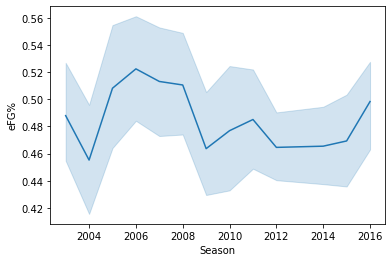

In [29]:
sns.lineplot(x="Season", y="eFG%", data=df_features[df_features.TeamName == "Texas"])

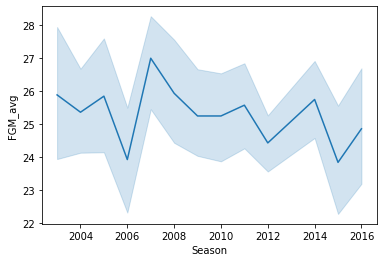

In [30]:
sns.lineplot(x="Season", y="FGM_avg", data=df_features[df_features.TeamName == "Texas"])

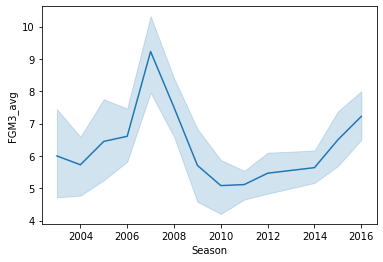

In [31]:
sns.lineplot(x="Season", y="FGM3_avg", data=df_features[df_features.TeamName == "Texas"])

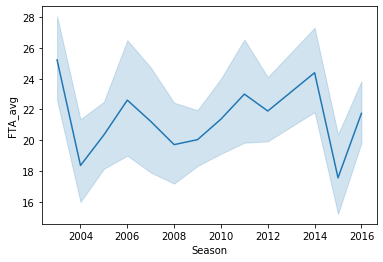

In [32]:
sns.lineplot(x="Season", y="FTA_avg", data=df_features[df_features.TeamName == "Texas"])